In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-detection-dataset-classification/spam.csv


# Importing modules

In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=20cf262981e044f8d5b9d3ab43201245f7fff944cd0768e0a43ef6a6ba9723fe
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# for language detection
from langdetect import detect

# Data Importing 

In [4]:
data = pd.read_csv("/kaggle/input/email-spam-detection-dataset-classification/spam.csv", encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning 

In [5]:
# total NANs
data.isna().sum().sum()

16648

In [6]:
# nan per columns
for i in data.columns:
    na = data[i].isna().sum()
    print(f"{i} : {na}")

v1 : 0
v2 : 0
Unnamed: 2 : 5522
Unnamed: 3 : 5560
Unnamed: 4 : 5566


In [7]:
# removing irrelevant columns
clean_data = data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [8]:
clean_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
clean_data.isna().sum().sum()

0

In [10]:
# Remove puncitions 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def remove_pun(words):
    words = tokenizer.tokenize(words)
    words = " ".join(words)
    return words

clean_data.v2 = clean_data.v2.apply(remove_pun)
clean_data.v2[1]

'Ok lar Joking wif u oni'

In [11]:
# defining the function for detection
def lang_detect(data):
    m = ""
    try:
        m = detect(data)
    except:
        pass
    return m
s = pd.Series(clean_data["v2"].apply(lang_detect))
s.unique()

array(['en', 'af', 'so', 'es', 'it', 'da', 'cy', 'sk', 'sl', 'fr', 'sv',
       'nl', 'tl', 'vi', 'id', 'no', 'de', 'sq', 'cs', 'et', 'ca', 'pt',
       'tr', 'pl', 'hr', '', 'sw', 'ro', 'lt'], dtype=object)

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def word_stemmer(words):

    words = words.split(" ")
    stem_words = [stemmer.stem(i) for i in words]
    return " ".join(stem_words)


# text normalization data
clean_data.v2 = clean_data.v2.apply(word_stemmer)

In [13]:
clean_data.v2.head()

0    Go until jurong point crazi avail onli in bugi...
1                                Ok lar joke wif u oni
2    free entri in 2 a wkli comp to win FA cup fina...
3          U dun say so earli hor U c alreadi then say
4    nah I don t think he goe to usf he live around...
Name: v2, dtype: object

# EDA

In [14]:
clean_data.describe()

,v1,v2
count,5572,5572
unique,2,5130
top,ham,sorri I ll call later
freq,4825,30


In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
clean_data.v1.unique()

array(['ham', 'spam'], dtype=object)

In [17]:
clean_data.v2.unique()

array(['Go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat',
       'Ok lar joke wif u oni',
       'free entri in 2 a wkli comp to win FA cup final tkt 21st may 2005 text FA to 87121 to receiv entri question std txt rate T C s appli 08452810075over18 s',
       ..., 'piti wa in mood for that So ani other suggest',
       'the guy did some bitch but I act like i d be interest in buy someth els next week and he gave it to us for free',
       'rofl it true to it name'], dtype=object)

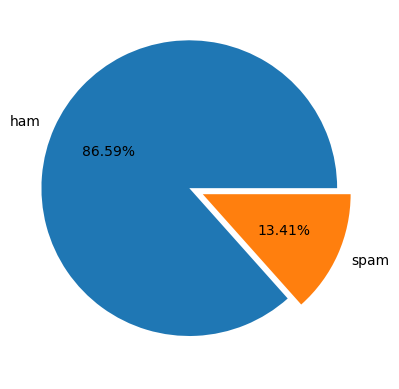

In [18]:
plt.pie(clean_data['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [19]:
ham_df = clean_data.loc[clean_data['v1'] == "ham"]
spam_df = clean_data.loc[clean_data['v1'] == "spam"]

ham_text = [i for i in ham_df.v2]
ham_text = " ".join(ham_text)

spam_text = [i for i in spam_df.v2]
spam_text = " ".join(spam_text) 

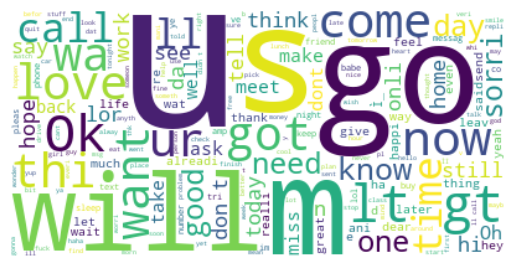

In [20]:
# ham words
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ham_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

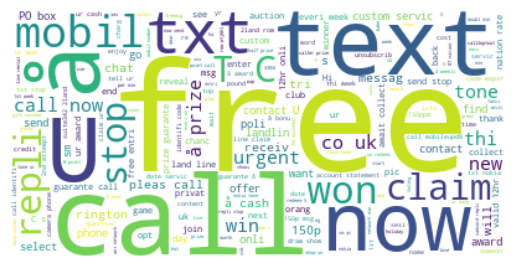

In [21]:
# Spam words
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(spam_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Processing and Feature Extraction 

In [22]:
# Encoding lables 
le = preprocessing.LabelEncoder()
clean_data[['v1']] = clean_data[['v1']].apply(le.fit_transform)

In [23]:
clean_data

,v1,v2
0,0,Go until jurong point crazi avail onli in bugi...
1,0,Ok lar joke wif u oni
2,1,free entri in 2 a wkli comp to win FA cup fina...
3,0,U dun say so earli hor U c alreadi then say
4,0,nah I don t think he goe to usf he live around...
...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u U ...
5568,0,will Ì_ b go to esplanad fr home
5569,0,piti wa in mood for that So ani other suggest
5570,0,the guy did some bitch but I act like i d be i...


In [24]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data.v2,clean_data.v1, test_size=0.25,stratify=clean_data.v1)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer = vectorizer.fit(X_train)

# summarize
# print(vectorizer.vocabulary_)

# encode document
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
# summarize encoded vector
print(X_test.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
print(X_train.shape)
print(X_test.shape)

(4179, 6198)
(1393, 6198)


# Checking for class Imbalance

In [27]:
print(f"{(y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]))*100:.2f}% of spam values in training dataset")

13.40% of spam values in training dataset


In [28]:
print(f"{(y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1]))*100:.2f}% of spam values in testing dataset")

13.42% of spam values in testing dataset


# Training 

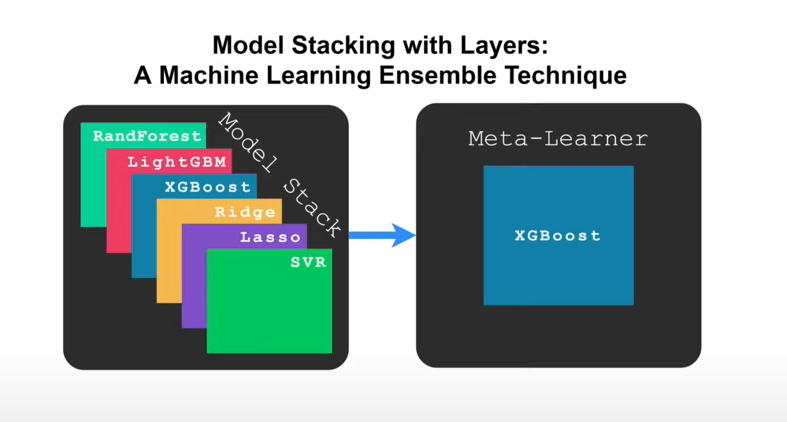

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

# i.) Neural Networks Classifier

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.9770279971284996
- MCC: 0.8983162866155767
- F1 score: 0.9761442296763118
----------------------------------
Model performance for Test set
- Accuracy: 0.9727207465900933
- MCC: 0.8787101984217939
- F1 score: 0.9714685880299013


# ii.) KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.9473558267528117
- MCC: 0.7565378841806755
- F1 score: 0.941698001643748
----------------------------------
Model performance for Test set
- Accuracy: 0.923905240488155
- MCC: 0.6309986681127279
- F1 score: 0.9104583268161642


# iii.) SVM Classifier

In [32]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.9995214166068438
- MCC: 0.9979369771879911
- F1 score: 0.9995210546385088
----------------------------------
Model performance for Test set
- Accuracy: 0.9705671213208902
- MCC: 0.86895252951871
- F1 score: 0.9690011612629186


# iv.) Desicion Tree Classifier

In [33]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9633883704235463
- MCC: 0.8343135597007005
- F1 score: 0.961399418660599
----------------------------------
Model performance for Test set
- Accuracy: 0.9440057430007178
- MCC: 0.7393836971528794
- F1 score: 0.9400753160819018


# v.) Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9964106245513281
- MCC: 0.984478118425025
- F1 score: 0.9963899738857038
----------------------------------
Model performance for Test set
- Accuracy: 0.9698492462311558
- MCC: 0.8656245382483135
- F1 score: 0.968200134025061


# vi.) Kmeans Classifier

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2
                ,init = 'k-means++',   
                max_iter = 200, 
                n_init = 3, 
                random_state = 0) #Applying Kmeans classifier
kmeans.fit(X_train,y_train)

# Make predictions
y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

# Training set performance
km_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
km_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
km_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
km_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
km_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
km_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % km_train_accuracy)
print('- MCC: %s' % km_train_mcc)
print('- F1 score: %s' % km_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % km_test_accuracy)
print('- MCC: %s' % km_test_mcc)
print('- F1 score: %s' % km_test_f1)

Model performance for Training set
- Accuracy: 0.6556592486240728
- MCC: -0.10254131423720289
- F1 score: 0.6945469809111737
----------------------------------
Model performance for Test set
- Accuracy: 0.6633165829145728
- MCC: -0.10823966301113469
- F1 score: 0.6986350948963931


# Building a Stacked Classifier 

In [36]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp), 
    ("kmeans",kmeans),
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9870782483847811
- MCC: 0.9436845268302578
- F1 score: 0.9869583853227856


# Results

In [37]:
acc_train_list = {'knn':knn_train_accuracy,
                'svm_rbf': svm_rbf_train_accuracy,
                'dt': dt_train_accuracy,
                'rf': rf_train_accuracy,
                'mlp': mlp_train_accuracy,
                'kmeans': km_train_accuracy,  
                'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
                'svm_rbf': svm_rbf_train_mcc,
                'dt': dt_train_mcc,
                'rf': rf_train_mcc,
                'mlp': mlp_train_mcc,
                'kmeans': km_train_mcc,  
                'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
                'svm_rbf': svm_rbf_train_f1,
                'dt': dt_train_f1,
                'rf': rf_train_f1,
                'mlp': mlp_train_f1,
                'kmeans': km_train_f1,  
                'stack': stack_model_train_f1}
     

In [38]:
mcc_train_list

{'knn': 0.7565378841806755,
 'svm_rbf': 0.9979369771879911,
 'dt': 0.8343135597007005,
 'rf': 0.984478118425025,
 'mlp': 0.8983162866155767,
 'kmeans': -0.10254131423720289,
 'stack': 1.0}

In [39]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df
     

,Accuracy,MCC,F1
knn,0.947356,0.756538,0.941698
svm_rbf,0.999521,0.997937,0.999521
dt,0.963388,0.834314,0.961399
rf,0.996411,0.984478,0.996390
mlp,0.977028,0.898316,0.976144
kmeans,0.655659,-0.102541,0.694547
stack,1.000000,1.000000,1.000000


# Saving the tokenizer and model 

In [40]:
import joblib 
joblib.dump(stack_model,"stacked_model.joblib")
joblib.dump(vectorizer,"tokenizer.joblib")

['tokenizer.joblib']

In [41]:
# testing the saved model
loaded_model = joblib.load("stacked_model.joblib")
loaded_vectorizer = joblib.load("tokenizer.joblib")

In [42]:
clean_data.v2

0       Go until jurong point crazi avail onli in bugi...
1                                   Ok lar joke wif u oni
2       free entri in 2 a wkli comp to win FA cup fina...
3             U dun say so earli hor U c alreadi then say
4       nah I don t think he goe to usf he live around...
                              ...                        
5567    thi is the 2nd time we have tri 2 contact u U ...
5568                     will Ì_ b go to esplanad fr home
5569        piti wa in mood for that So ani other suggest
5570    the guy did some bitch but I act like i d be i...
5571                              rofl it true to it name
Name: v2, Length: 5572, dtype: object

In [43]:
X_train = loaded_vectorizer.transform(clean_data.v2)
X_train.shape

(5572, 6198)

In [44]:
loaded_model.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0])